In [8]:
%matplotlib inline
import sys
sys.path.insert(0,'..')
from IPython.display import HTML,Image,SVG,YouTubeVideo
from helpers import header

HTML(header())

# Border based segmentation
We have seen that berder detection can be achieved by various filters, e.g. by convolution (linear filters) or by non linear filters such as morphological gradient.

The results of these filters is an image where pixels located near abrupt gray level changes have a high intensity whereas pixels located in more contiuous regions share a low value.

Here below, the result of a Sobel filter on the an image whith clearly identifiable objects:

In [9]:
def norm_hist(ima):
    hist,bins = np.histogram(ima.flatten(),range(256))  # histogram is computed on a 1D distribution --> flatten()
    return 1.*hist/np.sum(hist) # normalized histogram

def display_hist(ima):
    plt.figure(figsize=[10,5])
    if ima.ndim == 2:
        nh = norm_hist(ima)
    else:
        nh_r = norm_hist(ima[:,:,0])
        nh_g = norm_hist(ima[:,:,1])
        nh_b = norm_hist(ima[:,:,2])
    # display the results
    plt.subplot(1,2,1)
    plt.imshow(ima,cmap=plt.cm.gray)
    plt.subplot(1,2,2)
    if ima.ndim == 2:
        plt.plot(nh,label='hist.')
    else:
        plt.plot(nh_r,color='r',label='r')
        plt.plot(nh_g,color='g',label='g')
        plt.plot(nh_b,color='b',label='b')
    plt.legend()
    plt.xlabel('gray level');

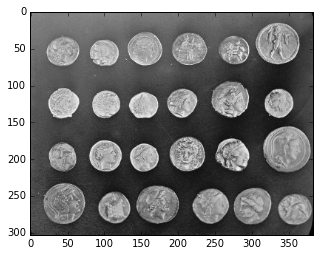

In [10]:
from skimage.data import camera,coins
from skimage.filter import sobel
import matplotlib.pyplot as plt
import numpy as np

im = coins().astype(np.float)
plt.imshow(im,cmap=plt.cm.gray);

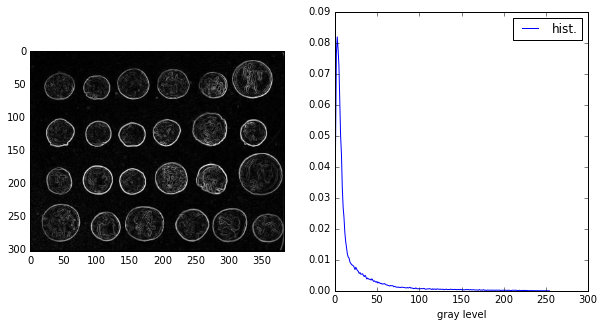

In [11]:
fsobel = sobel(im) 
norm = 255*fsobel/np.max(fsobel)

display_hist(norm)

In order to separate object one can consider only very sharp borders, e.g. with $sobel>50$. 

In [12]:
import bokeh.plotting as bk
from helpers import bk_image,bk_image_hoover,bk_compare_image

bk.output_notebook()

Loading BokehJS ...

In [13]:

borders = 255*(norm>50)
bk_image(borders)


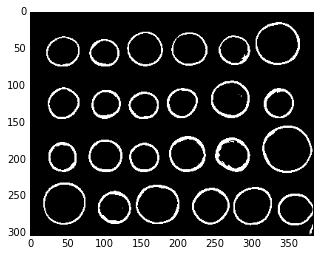

In [14]:
import skimage.filters.rank as skr
from skimage.morphology import disk

fim = skr.median(im.astype(np.uint8),disk(7))
fsobel = sobel(fim) 
norm = 255*fsobel/np.max(fsobel)

plt.imshow(norm>30,cmap=plt.cm.gray)


looking carefully to the obtained borders, we see that, depending on the threshold level choosen, some borders may be disconnected.

Questions:
* do you know a better edge detection that maybe help to solve this problem ?